# Orders Analysis (Rounded to Whole Numbers)

**Columns expected:** `Customer Name`, `Order Date`, `Order Amount`, `Country`

> Tip: If pandas or matplotlib aren't installed on your PC, run:
```
pip install pandas matplotlib
```


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Set your CSV path ---
# Change this to your local path if different
csv_path = r"Question 3 - Program Application (Public) - Sheet1.csv"

# Load data
df = pd.read_csv(csv_path)

# Ensure dtypes are correct
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Order Amount"] = pd.to_numeric(df["Order Amount"], errors="coerce")

df.head()

,Customer Name,Order Date,Order Amount,Country
0,John Doe,2025-01-01,150,USA
1,Jane Smith,2025-01-02,50,Canada
2,Alice Johnson,2025-01-03,200,UK
3,Bob Brown,2025-01-04,120,Germany
4,Charlie White,2025-01-05,90,France


In [3]:
# 1) Total order value for "John Doe" (only orders > $100)
john_over_100 = df[(df["Customer Name"] == "John Doe") & (df["Order Amount"] > 100)]
total_john_over_100 = int(round(john_over_100["Order Amount"].sum()))
total_john_over_100

890

In [4]:
# 2) Country with highest total revenue (only orders > $100)
over_100 = df[df["Order Amount"] > 100]
country_totals_over_100 = over_100.groupby("Country", as_index=False)["Order Amount"].sum()

if not country_totals_over_100.empty:
    top_row = country_totals_over_100.sort_values("Order Amount", ascending=False).iloc[0]
    top_country = top_row["Country"]
    top_country_revenue = int(round(float(top_row["Order Amount"])))
else:
    top_country, top_country_revenue = None, 0

top_country, top_country_revenue

('USA', 4680)

In [5]:
# 3) Average order amount across all orders > $100 (rounded to whole number)
avg_over_100 = int(round(over_100["Order Amount"].mean())) if not over_100.empty else None
avg_over_100

193

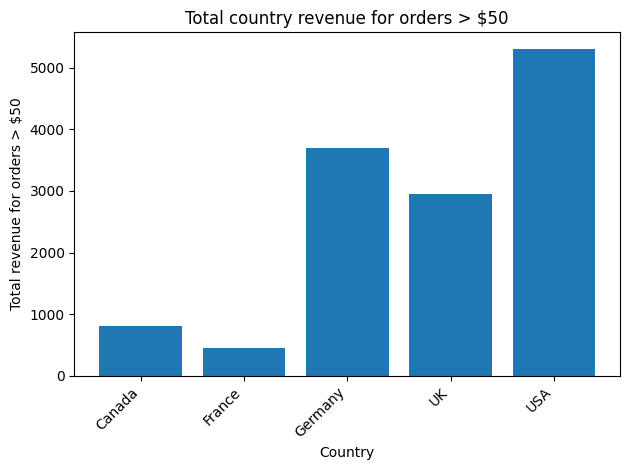

,Country,Order Amount
0,Canada,800
1,France,445
2,Germany,3705
3,UK,2955
4,USA,5310


In [9]:
# 4) Bar chart: total revenue by country (only orders > $50)
over_50 = df[df["Order Amount"] > 50]
countyr_rev_over50 = over_50.groupby("Country", as_index=False)["Order Amount"].sum()

# Plot (single plot, default colors)
plt.figure()
plt.bar(countyr_rev_over50["Country"], countyr_rev_over50["Order Amount"])
plt.xlabel("Country")
plt.ylabel("Total revenue for orders > $50")
plt.title("Total country revenue for orders > $50")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

countyr_rev_over50